you have two feature as citrus acid content and density of wine

you have to calculate the quality by using the formula 

citrus acid content can be in range(1 to 5)

density of wine can be in range(9930 to 9970)

quality =0.0015*(var1/var2)plot the KNN graph and predict the quality of wine

quality range wine status

5-6.5 normal

6.5-8 good

8-10 best

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import accuracy_score,confusion_matrix

In [4]:
np.random.seed(50)
citrus_acid = np.random.uniform(1, 5, 200)
density = np.random.uniform(9930, 9970, 200)
quality = 15000 * (citrus_acid / density)

wine=pd.DataFrame({"Citrus_Acid":citrus_acid, "Density":density, "Quality":quality})
wine

,Citrus_Acid,Density,Quality
0,2.978407,9966.010882,4.482847
1,1.912332,9964.613144,2.878685
2,2.021896,9945.370540,3.049503
3,2.585320,9958.023388,3.894327
4,2.509260,9931.485188,3.789857
...,...,...,...
195,1.841427,9958.516302,2.773647
196,2.848706,9958.097338,4.291039
197,1.336040,9937.516654,2.016661
198,2.326009,9932.659057,3.512668


In [16]:
def quality_category(q):
    if 5 <= q < 6.5:
        return "Normal"
    elif 6.5 <= q < 8:
        return "Good"
    elif 8 <= q <= 10:
        return "Best"
    return "Best"

data["QUALITY_ENCODED"] = label_encoder.fit_transform(data["QUALITY"])
print("Quality Categories:")
print(quality_categories)

Quality Categories:
['Best' 'Best' 'Best' 'Best' 'Best' 'Good' 'Best' 'Normal' 'Normal' 'Best'
 'Best' 'Best' 'Best' 'Good' 'Good' 'Best' 'Best' 'Good' 'Normal' 'Best'
 'Best' 'Best' 'Good' 'Best' 'Normal' 'Best' 'Best' 'Best' 'Best' 'Good'
 'Good' 'Normal' 'Normal' 'Best' 'Good' 'Best' 'Normal' 'Normal' 'Normal'
 'Best' 'Normal' 'Good' 'Normal' 'Best' 'Good' 'Normal' 'Normal' 'Best'
 'Good' 'Best' 'Best' 'Normal' 'Best' 'Best' 'Good' 'Best' 'Best' 'Normal'
 'Best' 'Best' 'Best' 'Best' 'Best' 'Best' 'Good' 'Normal' 'Best' 'Good'
 'Good' 'Best' 'Normal' 'Good' 'Best' 'Normal' 'Normal' 'Good' 'Good'
 'Best' 'Best' 'Best' 'Best' 'Normal' 'Best' 'Best' 'Good' 'Normal'
 'Normal' 'Good' 'Best' 'Normal' 'Best' 'Normal' 'Best' 'Normal' 'Best'
 'Best' 'Best' 'Best' 'Good' 'Best' 'Best' 'Best' 'Best' 'Best' 'Best'
 'Normal' 'Good' 'Best' 'Best' 'Good' 'Normal' 'Normal' 'Best' 'Normal'
 'Best' 'Best' 'Best' 'Good' 'Best' 'Good' 'Normal' 'Best' 'Best' 'Best'
 'Best' 'Best' 'Best' 'Good' 'Good' 'Be

In [17]:
data = pd.DataFrame({
    "CITRUS_ACID": citrus_acid,
    "DENSITY": density,
    "QUALITY": quality_categories
})

In [18]:
label_encoder = LabelEncoder()
data["QUALITY"] = label_encoder.fit_transform(data["QUALITY"])

In [19]:
X = data[["CITRUS_ACID", "DENSITY"]]
y = data["QUALITY"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)

In [20]:
knn_model = KNeighborsClassifier(n_neighbors=4)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [21]:
y_pred = knn_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.7166666666666667
Confusion Matrix:
 [[34  0  2]
 [ 1  5  5]
 [ 6  3  4]]


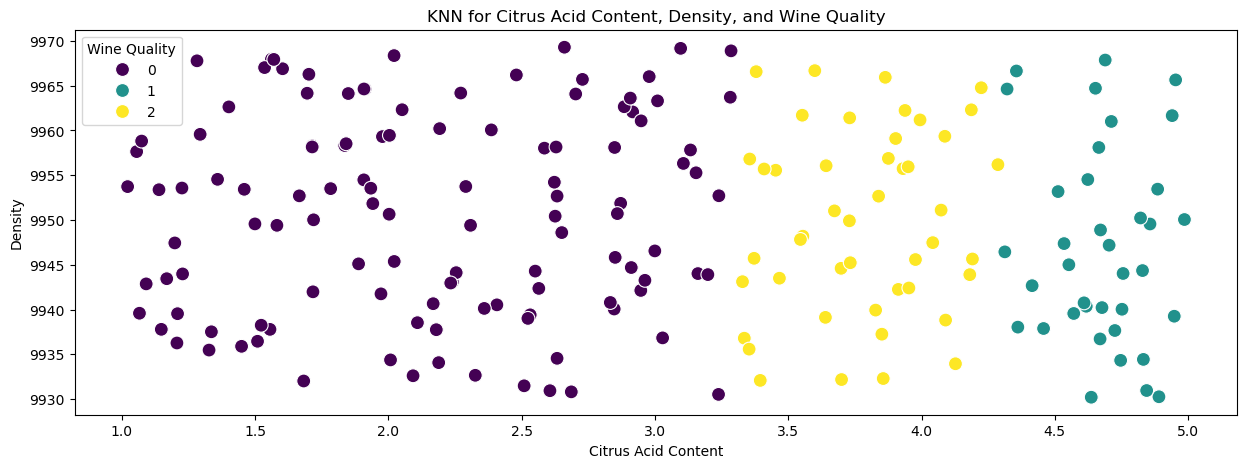

In [22]:
plt.figure(figsize=(15, 5))
sns.scatterplot(data=data, x="CITRUS_ACID", y="DENSITY", hue=data["QUALITY"], palette="viridis", s=100)
plt.title("KNN for Citrus Acid Content, Density, and Wine Quality")
plt.xlabel("Citrus Acid Content")
plt.ylabel("Density")
plt.legend(title="Wine Quality")
plt.show()

In [23]:
def predict_wine_quality(citrus_acid, density, model, label_encoder):
    input_data = np.array([[citrus_acid, density]])
    predicted_category = model.predict(input_data)
    return label_encoder.inverse_transform(predicted_category)[0]

Enter Citrus Acid Content (1 to 5):  3
Enter Density of Wine (9930 to 9970):  9950


Citrus Acid Content = 3.0, Density = 9950.0, Predicted Quality = Best
Nearest Neighbors' Distances: [[0.5685146  0.72800404 0.91209981 1.18802786]]


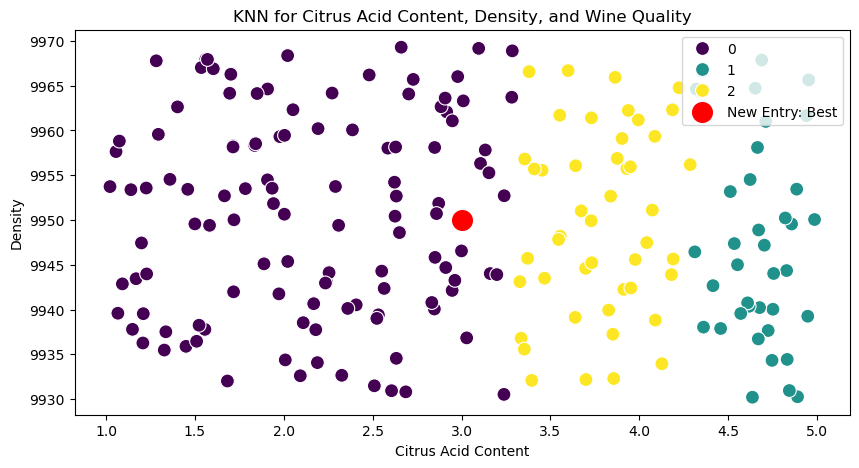

In [25]:
user_citrus_acid = float(input("Enter Citrus Acid Content (1 to 5): "))
user_density = float(input("Enter Density of Wine (9930 to 9970): "))

predicted_quality = predict_wine_quality(user_citrus_acid, user_density, knn_model, label_encoder)
distances, indices = knn_model.kneighbors([[user_citrus_acid, user_density]], n_neighbors=4)

print(f"Citrus Acid Content = {user_citrus_acid}, Density = {user_density}, Predicted Quality = {predicted_quality}")
print(f"Nearest Neighbors' Distances: {distances}")

plt.figure(figsize=(10, 5))
sns.scatterplot(data=data, x="CITRUS_ACID", y="DENSITY", hue="QUALITY", palette="viridis", s=100)
plt.scatter(user_citrus_acid, user_density, color='red', s=200, label=f'New Entry: {predicted_quality}')
plt.title("KNN for Citrus Acid Content, Density, and Wine Quality")
plt.xlabel("Citrus Acid Content")
plt.ylabel("Density")
plt.legend(loc="upper right")
plt.show()